# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array
from scipy.stats import norm

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Definition of unified probability interval

Assuming Gausian probability distribution with physical bound on true mean

In [3]:
# Return unified interval corresponsing to given CL

# Variable pdf width!!!
# Precision better for small than for large mean

def sigma(mean):
#    sig = 0.6+ 0.15*mean
    sig = 1.+np.arctan(mean-1)/np.pi
#    sig = 1
    return sig

def problim(mean,cl):
    
# Find sum range required for % level precision

    prec = 0.0001*(1-cl)

    sig = sigma(mean)
    xmin = mean+sig*norm.isf(1-prec)
    xmax = mean+sig*norm.isf(prec)

    nbin=10000
    dx=(xmax-xmin)/nbin
    
# Considered interval candidates

    xtab = np.linspace(xmin+0.5*dx,xmax-0.5*dx,nbin)
    ptab = norm.pdf(xtab,mean,sig)

# Highest likelihood for each candidate

    xbest = xtab * (xtab > 0.)
    pbest = norm.pdf(xtab,xbest,sig)
    
# Sort candidates according to the probability ratio

    prat = ptab/pbest
    
    isort= np.argsort(prat)

    xlo=xmax
    xhi=xmin
    psum=0

    
    for ip in reversed(isort):
        psum += dx*ptab[ip]
        if(xlo>xtab[ip]): xlo=xtab[ip]
        if(xhi<xtab[ip]): xhi=xtab[ip]
#        print(ip,psum,xtab[ip],ptab[ip],xbest[ip],pbest[ip],prat[ip])
        if(psum>cl): break
        
#    print(mean,xmin,xmax,xlo,xhi)     
    return xlo-dx/2.,xhi+dx/2.

# Help function to check coverage

def probsum(mean,x1,x2):
    sig = sigma(mean)
    p12= norm.cdf(x2,mean,sig) - norm.cdf(x1,mean,sig)
    return p12


### (3) Define set of hypothesis

In [4]:
# Considered values of true mean

# vmean = np.linspace(0.,6.,13)
# vmean = np.linspace(0.,5.5,12)
# vmean = np.linspace(0.,6.,61)
vmean = np.linspace(0.,6.,601)
# vmean = np.linspace(0.,5.6,561)

CL = 0.90

# Upper an lower edges of x probability intervals

vlow = np.empty(vmean.size)
vhig = np.empty(vmean.size)

for im in range(vmean.size):
    vlow[im],vhig[im] = problim(vmean[im],CL)


### (4)  Print interval information

In [5]:
print("\nProbability intervals for x:")

print("\n  true mean     n_low     n_high    CL")

for im in range(vmean.size) :
    ucl = probsum(vmean[im],vlow[im],vhig[im])
    
    print ("%10.3f   %8.3f  %8.3f     %8.6f" % (vmean[im],vlow[im],vhig[im],ucl))



Probability intervals for x:

  true mean     n_low     n_high    CL
     0.000     -3.199     0.962     0.900073
     0.010     -3.195     0.974     0.900073
     0.020     -3.192     0.986     0.900073
     0.030     -3.189     0.998     0.900073
     0.040     -3.186     1.010     0.900073
     0.050     -3.183     1.022     0.900073
     0.060     -3.181     1.034     0.900073
     0.070     -3.178     1.046     0.900073
     0.080     -3.175     1.059     0.900073
     0.090     -3.173     1.071     0.900073
     0.100     -3.170     1.083     0.900073
     0.110     -3.168     1.095     0.900073
     0.120     -3.165     1.108     0.900073
     0.130     -3.163     1.120     0.900073
     0.140     -3.161     1.132     0.900073
     0.150     -3.159     1.145     0.900073
     0.160     -3.024     1.157     0.900062
     0.170     -2.850     1.169     0.900030
     0.180     -2.699     1.182     0.900118
     0.190     -2.561     1.195     0.900010
     0.200     -2.442     1.20

### (5) Draw probability intervals

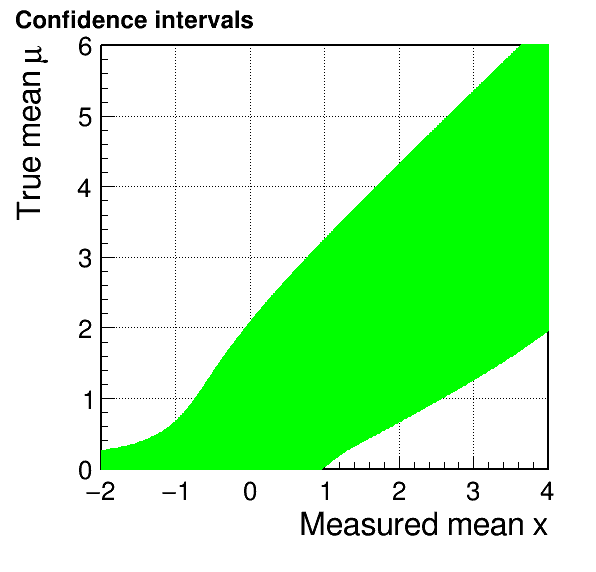

Info in <TCanvas::Print>: png file 06_gauss_interval4_1_601.png has been created


In [6]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

gStyle.SetCanvasDefH(600)  # To match that in the paper

cexp = TCanvas('cexp')
   
# Histogram to produce frame

Xmin=-2
Xmax=4
Ymin=0
Ymax=6

hexp = TH1D('hexp','Confidence intervals',10, Xmin, Xmax)

hexp.GetXaxis().SetTitle("Measured mean x")
hexp.GetYaxis().SetTitle("True mean #mu")
hexp.SetMinimum(Ymin)
hexp.SetMaximum(Ymax)
hexp.SetLineWidth(0)    # To suppress horizontal line at zero

# No statistics

hexp.SetStats(0)

# Plot empty histogram (frame)

hexp.SetMarkerStyle(20)
hexp.DrawCopy('HIST')

# Overlay probability interval lines

lint = TLine()
lint.SetLineColor(3)
lint.SetLineWidth(2)

for im in range(vmean.size) :
    vl=max(vlow[im],Xmin)
    vh=min(vhig[im],Xmax)
    lint.DrawLine(vl,vmean[im],vh,vmean[im])

cexp.Update()
fname = '06_gauss_interval4_1_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

### (6) Generate limit graphs

In [7]:
lgr = TGraph(vmean.size,array('d',vlow),array('d',vmean))
hgr = TGraph(vmean.size,array('d',vhig),array('d',vmean))

# Set graph options

lgr.SetNameTitle("lgr","Lower edge of x probability interval")
hgr.SetNameTitle("hgr","Upper edge of x probability interval")

lgr.SetMarkerStyle(20)
lgr.SetMarkerSize(0.7)
lgr.SetMarkerColor(2)
lgr.SetLineColor(2)
lgr.SetLineWidth(2)

hgr.SetMarkerStyle(20)
hgr.SetMarkerSize(0.7)
hgr.SetMarkerColor(4)
hgr.SetLineColor(4)
hgr.SetLineWidth(2)


### (7) Plot results

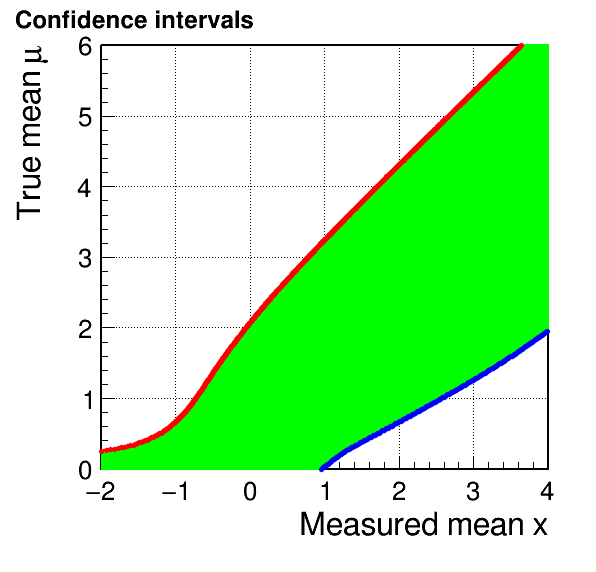

Info in <TCanvas::Print>: png file 06_gauss_interval4_2_601.png has been created


In [8]:
# Plot limit graphs

lgr.Draw('LP')
hgr.Draw('LP')

# Store and show

cexp.Update()
fname = '06_gauss_interval4_2_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

### (8) Hypothetical measurement

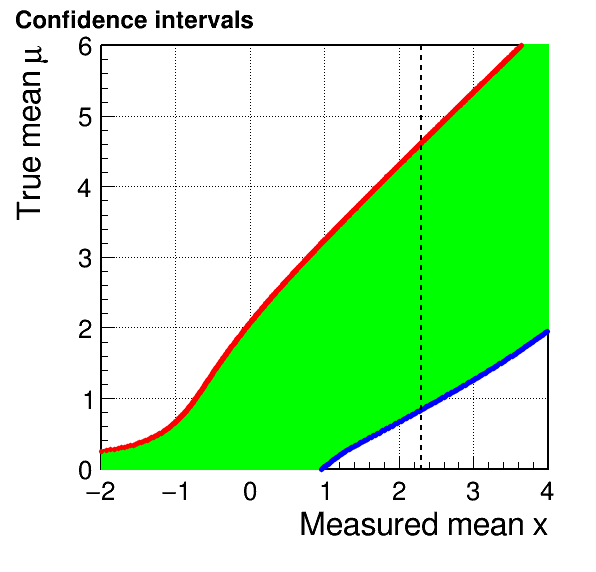

Info in <TCanvas::Print>: png file 06_gauss_interval4_3_601.png has been created


In [9]:
Xm = 2.3

lxm = TLine()
lxm.SetLineColor(1)
lxm.SetLineWidth(2)
lxm.SetLineStyle(7)

lxm.DrawLine(Xm,Ymin,Xm,Ymax)

cexp.Update()
fname = '06_gauss_interval4_3_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

In [10]:
# Look for proper point in limit table
# Interpolate between two points

for im in range(vmean.size-1) :
    if Xm > vlow[im] and Xm <= vlow[im+1]:
        frac = (Xm-vlow[im])/(vlow[im+1]-vlow[im])
        print('Upper limit : ',frac*vmean[im+1]+(1-frac)*vmean[im])
    if Xm > vhig[im] and Xm <= vhig[im+1]:
        frac = (Xm-vhig[im])/(vhig[im+1]-vhig[im])
        print('Lower limit : ',frac*vmean[im+1]+(1-frac)*vmean[im])        

Lower limit :  0.8403238877459736
Upper limit :  4.625945428500046
